# **Data Analysis & Pattern Recognition**

## *Performance Evaluation. Type I and Type II errors*

Master's Degree in Chemical Engineering

Master's Degree in Interdisciplinary and Innovative Engineering

Lecturer: Francesc **Pozo** (`francesc.pozo@upc.edu`)

# **Example** (pages 19, 20 and 21)
Given a normal distribution with unknown mean $\mu$ and known standard deviation $\sigma=2$, one whishes to test 
\begin{align*}
H_0\ :\ \mu=1\quad\text{ versus }\quad H_1\ :\ \mu=4
\end{align*}

A sample of size one is taken where $R=(2,+\infty)$.

Determine $\alpha$ and $\beta$ for this experiment.

In [ ]:
# alpha
from scipy.stats import norm
1-norm.cdf(2, loc=1, scale=2)

0.3085375387259869

In [ ]:
# beta
norm.cdf(2, loc=4, scale=2)

0.15865525393145707

# **Example** (pages 23, 24 and 25)

Given the density function
\begin{align*}
f(x;\theta)=\theta e^{-\theta x},\ x\geq 0,\ \theta>0,
\end{align*}

1.   Consider a test of hypothesis where $H_0\ :\ \theta=2$ versus $H_1\ :\ \theta>2$. Using a random sample of size one, find the critical value $k$ such that the test is conducted at the $\alpha=0.05$ level.
2.   Further, determine the power function of this test.

In [ ]:
# 1
from scipy.stats import expon
expon.ppf(0.95, loc=0, scale=1/2)

1.497866136776995

# **Example** (pages 27-32)
Test the null hypothesis that for a certain age group the mean score on an achievement test (scores follow a normal distribution with $\sigma=6$) is equal to $40$ against the alternative that it is not equal to $40$.


1.   Find the probability of type I error for $n=9$ if the null hypothesis is rejected when the sample mean is less than $36$ or greater than $44$.
2.   Find the probability of type I error for $n=36$ if the null hypothesis is rejected when the sample mean is less than $38$ or greater than $42$.
3. Plot the power functions for $n=9$ and $n=36$ for values of $\mu$ between $30$ and $50$.



In [ ]:
# 1
from scipy.stats import norm
norm.cdf(-2, loc=0, scale=1)+1-norm.cdf(2, loc=0, scale=1)

0.045500263896358306

In [ ]:
# 2
norm.cdf(-2, loc=0, scale=1)+1-norm.cdf(2, loc=0, scale=1)

0.045500263896358306

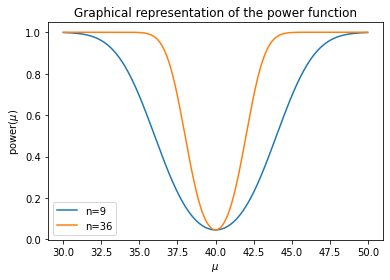

In [ ]:
# 3
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm 
def power9(mu):
  return norm.cdf((36-mu)/2, loc=0, scale=1)+(1-norm.cdf((44- mu)/2, loc=0, scale=1))
def power36(mu):
  return norm.cdf((38-mu)/1, loc=0, scale=1)+(1-norm.cdf((42- mu)/1, loc=0, scale=1))
rr = np.arange(30, 50, 0.01)
plt.xlabel('$\mu$')
plt.ylabel('power($\mu$)')
plt.title('Graphical representation of the power function')
plt.plot(rr, power9(rr),label='n=9')
plt.plot(rr, power36(rr),label='n=36')
plt.legend()
#plt.savefig('plot.eps', dpi=300, bbox_inches='tight')
plt.show()

# **Example** (pages 43-47)
A random sample of size $n=25$ is taken from a distribution known to be $N(\mu,\sigma)$. If  $\sum_{i=1}^nx_i=100$ and $\sum_{i=1}^nx_i^2=600$.


1.   Test the null hypothesis $H_0\ :\ \mu=2.5$ versus the alternative hypothesis $H_1\ :\ \mu\ne 2.5$ at the $\alpha=0.05$ significance level.

In [ ]:
# Rejection Region Calculations
from scipy.stats import t
t.ppf(0.975,24)

2.0638985616280205

In [ ]:
# Standardized Test Statistic
import numpy as np
s = np.sqrt((600-25*(100/25)**2)/24)
tobs = (4-2.5)/(s/np.sqrt(25))
print(s,tobs)

2.886751345948129 2.5980762113533156


In [ ]:
# Statistical Conclusion
from scipy.stats import t
2*(1-t.cdf(tobs,24)) < 0.05 
# if 'True', we reject the null hypothesis and we accept the alternative
# There is evidence to suggest that the mean is not equal to 2.5.

True

# **Example** (pages 50-53)
A researcher wishes to see if it reasonable to believe that engineering majors have **higher** math SAT scores than English majors. She takes two random samples. 

The first sample consists of $64$ engineering majors' SAT math scores ($X$). Typically, these scores follow a normal distribution with a known standard deviation of $\sigma_X=100$ but with an unknown mean. 

The second sample consists of $144$ observations of English majors' SAT scores ($Y$). These also follow a normal distribution with a standard deviation of $\sigma_Y=108$ with an unknown mean as well.

1.   Test the null hypothesis of equality of means at the $10\%$ significance level ($\alpha=0.1$) knowing the difference in sample means is $20$.

In [ ]:
from scipy.stats import norm
norm.ppf(0.9, loc=0, scale=1)

1.2815515655446004

In [ ]:
import numpy as np
tobs = (20-0)/(np.sqrt(100**2/64+108**2/144))
pv = 1-norm.cdf(tobs,loc=0,scale=1)
alpha = 0.1
pv < alpha 
# if 'True', we reject the null hypothesis and we accept the alternative
# The evidence suggests engineering majors have a higher average math SAT score.

True

# **Example** (pages  54-56)
A questionnaire is devised by the Board of Governors to measure the level of satisfaction for graduates from two competing state schools.

Past history indicates the variance in satisfaction levels for both schools is equal.

The questionnaire is randomly administered to $11$ students from State School $X$ $\{69,75,76,80,81,82,86,89,91,92,97\} $ and 15 students from State School $Y$ $\{59,62,66,70,70,75,75,77,78,79,81,84,84,86,94\}$.}

1.   Test to see if there are **significant differences** between the mean satisfaction levels for graduates of the two competing state schools using a significance level of $5\%$.



In [ ]:
import numpy as np
from scipy import stats
x = np.array([69,75,76,80,81,82,86,89,91,92,97])
y = np.array([59,62,66,70,70,75,75,77,78,79,81,84,84,86,94])
result = stats.ttest_ind(x, y, equal_var = True)
alpha = 0.05
result.pvalue < alpha
# if 'True', we reject the null hypothesis and we accept the alternative
# There is evidence to suggest the average satisfaction levels between State 
# School X and State School Y are different

True

# **Example** (pages 60-61)
Test whether the observations $5, 6, 7, 8,$ and $9$ are from a normal distribution with $\mu=6.5$ and $\sigma=\sqrt{2}$. That is, the hypothesized distribution is
$$
F_0(x)\hookrightarrow N(6.5,\sqrt{2})
$$

In [ ]:
from scipy import stats
import numpy as np
x = np.array([5,6,7,8,9])
mu = 6.5
sigma = np.sqrt(2)
kstest1 = stats.kstest(x, 'norm', args=(mu,sigma))
alpha = 0.10
print(kstest1.pvalue)
kstest1.pvalue < alpha
# if 'False', the K-S test does not reject the hypothesis that the sample 
# came from the normal distribution

0.8996364441822264


False

# **Example** (page 62)
Test whether the observations $5, 6, 7, 8,$ and $9$ are from a normal distribution with $\mu=\mu_X$ and $\sigma=\sigma_X$. That is, the hypothesized distribution is
$$
F_0(x)\hookrightarrow N(\mu_X,\sigma_X)
$$

In [ ]:
from scipy import stats
import numpy as np
x = np.array([5,6,7,8,9])
mu = x.mean()
sigma = x.std()
kstest2 = stats.kstest(x, 'norm',args=(mu,sigma))
alpha = 0.10
print(kstest2.pvalue)
kstest2.pvalue < alpha
# if 'False', the K-S test does not reject the hypothesis that the sample 
# came from the normal distribution

0.9995301060544028


False

# **Homework** (page 33)
Given a $N(\mu,1)$ population from which one takes a simple random sample of size $1$, test the null hypothesis $H_0\ :\ \mu=1$ versus the alternative hypothesis $H_1\ :\ \mu=2$.

Determine the significance level and the power of the test for the following rejection regions:


1.   $(2.036,+\infty)$ 
2.   $(1.100,1.300)\cup(2.461,+\infty)$



In [ ]:
# 1
from scipy.stats import norm
alpha = 1-norm.cdf(2.036, loc=1, scale=1)
power = 1-norm.cdf(2.036, loc=2, scale=1)
print(alpha)
print(power)

0.15010107125827754
0.485641179477751


In [ ]:
# 2
alpha = norm.cdf(1.3, loc=1, scale=1)-norm.cdf(1.1, loc=1, scale=1)+1-norm.cdf(2.461, loc=1, scale=1)
power = norm.cdf(1.3, loc=2, scale=1)-norm.cdf(1.1, loc=2, scale=1)+1-norm.cdf(2.461, loc=2, scale=1)
print(alpha)
print(power)

0.15009130562668482
0.3803028294275337


In [ ]:
pv = 1-t.cdf(t_obs,14) # p-value / if p-value < alpha, we reject H_0 and accept H_1
pv < 0.05

True

# **Homework** (page 48)
**One-sample $t$-test: Fertilizers**. A farmer wants to test if a new brand of fertilizer increases his wheat yields per plot. He puts the new fertilizer on $15$ equal plots and records the subsequent yields for the $15$ plots. If his traditional yield is two bushels per plot, conduct a test of significance for $\mu$ at the $\alpha=0.05$ significance level assuming the data follow a normal distribution. The yields for the $15$ yields are
$$
2.5\quad3.0\quad3.1\quad4.0\quad1.2\\
5.0\quad4.1\quad3.9\quad3.2\quad3.3\\
2.8\quad4.1\quad2.7\quad2.9\quad3.7
$$
The python function `stats.ttest_1samp` cannot be used in this example, since the alternative hypothesis is always two-tailed.

In [ ]:
import numpy as np
from scipy.stats import t
x = np.array([2.5,3.0,3.1,4.0,1.2,5.0,4.1,3.9,3.2,3.3,2.8,4.1,2.7,2.9,3.7])
t_obs =  (x.mean()-2)/(np.sqrt(np.var(x,ddof=1))/np.sqrt(15))
cv = t.ppf(0.95,14)
print(t_obs)
print(cv)
t_obs > cv # if 'True', we reject H_0 and accept H_1

5.644304098932023
1.7613101357748562


True

# **Homework** (page 58)
A bottled water company acquires its water from two independent sources $X$ and $Y$. 

The company suspects that the sodium content in the water from source $X$  is **less** than the sodium content for water from source $Y$. 

An independent agency measures  the sodium content in 20 samples from source $X$ and 10 samples from source $Y$. 

Is there statistical evidence to suggest the average sodium content in the water from source $X$ is less than the average sodium content in the water from source $Y$? 

The measurements for the sodium values are mg/l. Use an $\alpha$ level of $0.05$ to test the appropriate hypotheses.

$$
\text{Source X: }\\
84\ 73\ 92\ 84\ 95\ 74\ 80\ 86\ 80\ 77\\
86\ 72\ 62\ 54\ 77\ 63\ 85\ 59\ 66\ 79\\
\text{Source Y: }\\
78\ 79\ 84\ 82\ 80\ 85\ 81\ 83\ 79\ 81
$$

*The python function `stats.ttest_ind` cannot be used in this example, since in the python function the alternative hypothesis is always two-tailed.*

In [ ]:
import numpy as np
import math
from scipy.stats import t
x = np.array([84,73,92,84,95,74,80,86,80,77,86,72,62,54,77,63,85,59,66,79])
y = np.array([78,79,84,82,80,85,81,83,79,81])
nx = len(x)
ny = len(y)
sx2 = np.var(x,ddof=1)
sy2 = np.var(y,ddof=1)
nu=math.floor((sx2/nx+sy2/ny)**2/((sx2/nx)**2/(nx-1)+(sy2/ny)**2/(ny-1)))
t_obs = (np.mean(x)-np.mean(y))/(np.sqrt(sx2/nx+sy2/ny))
cv = t.ppf(0.05,nu)
t_obs < cv # if True, we reject H_0 and accept H_1

True

In [ ]:
t.cdf(t_obs,nu) # p-value / if p-value < alpha, we reject H_0 and accept H_1

0.038237572256928413

# **Homework** (page 63)
Test whether the data in the examples in the previous slides are from a normal distribution:

1. Fertilizers (on page 48);
2. Satisfaction levels (on page 55);
3. Sodium content (on page 58).


In [ ]:
# 1. Fertilizers
from scipy import stats
import numpy as np
x = np.array([2.5,3.0,3.1,4.0,1.2,5.0,4.1,3.9,3.2,3.3,2.8,4.1,2.7,2.9,3.7])
mu = np.mean(x)
sigma = np.sqrt(np.var(x,ddof=1))
kstestA = stats.kstest(x,'norm',args=(mu,sigma))
print(kstestA)

KstestResult(statistic=0.11823744549502706, pvalue=0.9847496959474226)


In [ ]:
# 2. Satisfaction Levels 
from scipy import stats
import numpy as np
x = np.array([69,75,76,80,81,82,86,89,91,92,97])
y = np.array([59,62,66,70,70,75,75,77,78,79,81,84,84,86,94])
muX = np.mean(x)
muY = np.mean(y)
sigmaX = np.sqrt(np.var(x,ddof=1))
sigmaY = np.sqrt(np.var(y,ddof=1))
kstestB = stats.kstest(x,'norm',args=(muX,sigmaX))
kstestC = stats.kstest(y,'norm',args=(muY,sigmaY))
print(kstestB)
print(kstestC)

KstestResult(statistic=0.11413748490227427, pvalue=0.9987920270288253)
KstestResult(statistic=0.12452526280497012, pvalue=0.9741602301957569)


In [ ]:
# 3. Sodium Content
from scipy import stats
import numpy as np
x = np.array([84,73,92,84,95,74,80,86,80,77,86,72,62,54,77,63,85,59,66,79])
y = np.array([78,79,84,82,80,85,81,83,79,81])
muX = np.mean(x)
muY = np.mean(y)
sigmaX = np.sqrt(np.var(x,ddof=1))
sigmaY = np.sqrt(np.var(y,ddof=1))
kstestD = stats.kstest(x,'norm',args=(muX,sigmaX))
kstestE = stats.kstest(y,'norm',args=(muY,sigmaY))
print(kstestD)
print(kstestE)

KstestResult(statistic=0.12159171665781243, pvalue=0.9289310817571578)
KstestResult(statistic=0.13465059414694236, pvalue=0.9934725233484011)
